In [1]:
import torch
import numpy as np

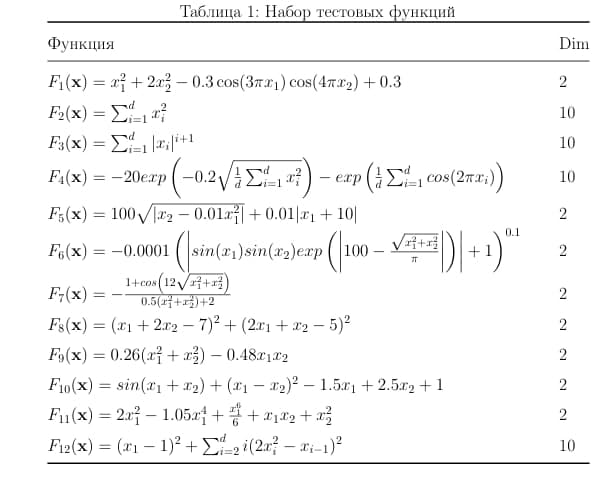

In [55]:
def F1(X):
    x1, x2 = X
    f = x1**2 + 2*x2**2 - 0.3*torch.cos(3*np.pi*x1)*torch.cos(4*np.pi*x2) + 0.3
    return f
def F2(X):
    x1, x2 = X
    return x1**2 + x2**2
def F3(X):
    s = torch.zeros(X.shape[0])
    for i in range(X.shape[1]):
        s += torch.pow(torch.abs(X[:, i]), i+1)
    return s
def F4(X):
    f = -20*torch.exp(-0.2*torch.sqrt(1/X.shape[1]*torch.pow(X,2).sum(axis=-1))) 
    f -= torch.exp(1/X.shape[1]*torch.cos(2*np.pi*X).sum(axis=-1))
    return f
def F5(X):
    x1, x2 = X
    f = 100*torch.sqrt(torch.abs(x2-0.01*x1**2)) + 0.01*torch.abs(x1+10)
    return f
def F6(X):
    x1, x2 = X
    f = -0.0001*(torch.abs(torch.sin(x1)*torch.sin(x2)*torch.exp(torch.abs(100-torch.sqrt(x1**2+x2**2)/np.pi)))+1)**0.1
    return f
def F7(X):
    x1, x2 = X
    f = - (1+torch.cos(12*torch.sqrt(x1**2+x2**2)))/(0.5*(x1**2+x2**2+2))
    return f
def F8(X):
    x1, x2 = X
    f = (x1+2*x2-7)**2 + (2*x1+x2-5)**2
    return f
def F9(X):
    x1, x2 = X
    f = 0.26*(x1**2+x2**2)-0.48*x1*x2
    return f
def F10(X):
    x1, x2 = X
    f = torch.sin(x1+x2)+(x1-x2)**2-1.5*x1+2.5*x2+1
    return f
def F11(X):
    x1, x2 = X
    f = 2*x1**2-1.05*x1**4+x**6/6+x1*x2+x2**2
    return f
def F12(X):
    assert X.shape <= (1, 1)
    f = (X[0]-1)**2
    for i in range(X.shape[1]):
        f += i*(2*X[:, i]**2 - X[:, i-1])**2 
    return f

In [56]:
func2_list = [
    F1, F5, F7,
    F8, F9, F10, F11,
]

In [43]:
funcs_list = [
    F1, F2, F3, F4,
    F5, F6, F7, F8,
    F8, F10, F11, F12,
             ]

In [44]:
from pytorch_optimizer.examples.viz_optimizers import execute_experiments, execute_steps
import torch_optimizer as optim
import matplotlib.pyplot as plt

In [45]:
def LookaheadYogi(*a, **kw):
    base = optim.Yogi(*a, **kw)
    return optim.Lookahead(base)
optimizers = [
        # baselines
        (torch.optim.Adam, -8, 0.5),
        (torch.optim.SGD, -8, -1.0),
        # Adam based
        (optim.AdaBound, -8, 0.3),
        (optim.AdaMod, -8, 0.2),
        (optim.AdamP, -8, 0.2),
        (optim.DiffGrad, -8, 0.4),
        (optim.Lamb, -8, -2.9),
        (optim.NovoGrad, -8, -1.7),
        (optim.RAdam, -8, 0.5),
        (optim.Yogi, -8, 0.1),
        # SGD/Momentum based
        (optim.AccSGD, -8, -1.4),
        (optim.SGDW, -8, -1.5),
        (optim.SGDP, -8, -1.5),
        (optim.PID, -8, -1.0),
        (optim.QHM, -6, -0.2),
        (optim.QHAdam, -8, 0.1),
        (optim.Ranger, -8, 0.1),
        (optim.RangerQH, -8, 0.1),
        (optim.RangerVA, -8, 0.1),
        (optim.Shampoo, -8, 0.1),
        (LookaheadYogi, -8, 0.1),
        (optim.AggMo, -8, -1.5),
        (optim.SWATS, -8, -1.5),
        (optim.Adafactor, -8, 0.5),
        (optim.A2GradUni, -8, 0.1),
        (optim.A2GradInc, -8, 0.1),
        (optim.A2GradExp, -8, 0.1),
        (optim.AdaBelief, -8, 0.1),
        (optim.Apollo, -8, 0.1),
    ]
    

In [46]:
def objective_F(params, F):
    lr = params['lr']
    optimizer_class = params['optimizer_class']
    initial_state = (-2.0, 3.5)
    minimum = (0, 0)
    optimizer_config = dict(lr=lr)
    num_iter = 100
    steps = execute_steps(
        F, initial_state, optimizer_class, optimizer_config, num_iter
    )
    return (steps[0][-1] - minimum[0]) ** 2 + (steps[1][-1] - minimum[1]) ** 2


In [47]:
import os
os.makedirs("experiments", exist_ok=True)

100%|██████████| 200/200 [00:14<00:00, 14.15trial/s, best loss: 1.6592632915096803e-06]
1.3563972332955794 <class 'torch.optim.adam.Adam'>
100%|██████████| 200/200 [00:11<00:00, 17.16trial/s, best loss: 0.06640412747263413]
0.36781395197406574 <class 'torch.optim.sgd.SGD'>
100%|██████████| 200/200 [00:13<00:00, 14.95trial/s, best loss: 2.1963684334604886e-07]
0.6696393466226553 <class 'torch_optimizer.adabound.AdaBound'>
100%|██████████| 200/200 [00:13<00:00, 14.67trial/s, best loss: 0.5123149405371947]
1.2211480562328063 <class 'torch_optimizer.adamod.AdaMod'>
100%|██████████| 200/200 [00:13<00:00, 14.94trial/s, best loss: 4.90572301265193e-06] 
0.8833400710591008 <class 'torch_optimizer.adamp.AdamP'>
100%|██████████| 200/200 [00:15<00:00, 12.58trial/s, best loss: 5.0652769086893985e-06]
1.1090868160932879 <class 'torch_optimizer.diffgrad.DiffGrad'>
100%|██████████| 200/200 [00:14<00:00, 13.37trial/s, best loss: 0.024714290865036015]
0.055016083432978896 <class 'torch_optimizer.lamb.L

/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:13<00:00, 15.35trial/s, best loss: 0.00013548367649011267]
0.15501091579732024 <class 'torch_optimizer.aggmo.AggMo'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:19<00:00, 10.52trial/s, best loss: 0.007571851596767987]
0.22309327593683198 <class 'torch_optimizer.swats.SWATS'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:16<00:00, 12.26trial/s, best loss: 2.6916410875767838]
0.002570076363613833 <class 'torch_optimizer.adafactor.Adafactor'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:13<00:00, 14.60trial/s, best loss: 1.2179554397977421]
0.002335241614601322 <class 'torch_optimizer.a2grad.A2GradUni'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:14<00:00, 13.75trial/s, best loss: 0.9016372068839482]
0.002335241614601322 <class 'torch_optimizer.a2grad.A2GradInc'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:14<00:00, 14.16trial/s, best loss: 1.3201239858802802]
0.002335241614601322 <class 'torch_optimizer.a2grad.A2GradExp'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:14<00:00, 13.91trial/s, best loss: 2.6459065371412654e-08]
0.8673143206822481 <class 'torch_optimizer.adabelief.AdaBelief'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:15<00:00, 12.66trial/s, best loss: 8.981214123130863e-07]
0.8518602663516648 <class 'torch_optimizer.apollo.Apollo'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:15<00:00, 13.05trial/s, best loss: 0.6223890747035767]
0.04105096164719873 <class 'torch.optim.adam.Adam'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:13<00:00, 14.32trial/s, best loss: 0.13457932289643623]
0.043242637744397926 <class 'torch.optim.sgd.SGD'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:15<00:00, 12.84trial/s, best loss: 0.6221962263794651]
0.0408676540633239 <class 'torch_optimizer.adabound.AdaBound'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:15<00:00, 12.71trial/s, best loss: 0.8046298163366465]
0.40964295691517655 <class 'torch_optimizer.adamod.AdaMod'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:15<00:00, 12.72trial/s, best loss: 0.6234342647137581]
0.04122700939790465 <class 'torch_optimizer.adamp.AdamP'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:18<00:00, 10.73trial/s, best loss: 0.6240404276260065]
0.08135090594457364 <class 'torch_optimizer.diffgrad.DiffGrad'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:18<00:00, 10.54trial/s, best loss: 0.5185423787655488]
0.03717306827689955 <class 'torch_optimizer.lamb.Lamb'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:14<00:00, 14.03trial/s, best loss: 0.46921997269061677]
0.0025585809890817965 <class 'torch_optimizer.novograd.NovoGrad'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:14<00:00, 14.28trial/s, best loss: 0.6838499854618085]
0.23569549729338887 <class 'torch_optimizer.radam.RAdam'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:14<00:00, 14.01trial/s, best loss: 0.6200847209087819]
0.04158634871082115 <class 'torch_optimizer.yogi.Yogi'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:14<00:00, 14.13trial/s, best loss: 0.4564881609171678]
0.01658478154177594 <class 'torch_optimizer.accsgd.AccSGD'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:13<00:00, 15.26trial/s, best loss: 0.13459885084494388]
0.04327065149237382 <class 'torch_optimizer.sgdw.SGDW'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:13<00:00, 14.87trial/s, best loss: 0.13459885084494388]
0.04327065149237382 <class 'torch_optimizer.sgdp.SGDP'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:13<00:00, 14.78trial/s, best loss: 0.13457932289643623]
0.043242637744397926 <class 'torch_optimizer.pid.PID'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:13<00:00, 15.24trial/s, best loss: 0.13475924414194462]
0.04303918050860426 <class 'torch_optimizer.qhm.QHM'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:14<00:00, 13.77trial/s, best loss: 0.6221702052182998]
0.0409493226118772 <class 'torch_optimizer.qhadam.QHAdam'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:15<00:00, 13.29trial/s, best loss: 0.9136298394236348]
0.3134796746972187 <class 'pytorch_ranger.ranger.Ranger'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:15<00:00, 13.00trial/s, best loss: 0.4555860142730417]
0.07181915084670794 <class 'pytorch_ranger.rangerqh.RangerQH'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:19<00:00, 10.33trial/s, best loss: 0.886883222255495] 
0.11904795298744829 <class 'pytorch_ranger.ranger913A.RangerVA'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:18<00:00, 10.60trial/s, best loss: 4.450857378890547]
0.5106129689429217 <class 'torch_optimizer.shampoo.Shampoo'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:14<00:00, 14.14trial/s, best loss: 0.5628518379628531]
0.07520025409898094 <function LookaheadYogi at 0x7f48e7dfa440>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:13<00:00, 14.49trial/s, best loss: 0.5824875959380087]
0.0025531476583363494 <class 'torch_optimizer.aggmo.AggMo'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:20<00:00,  9.73trial/s, best loss: 0.6250918986676943]
0.041017824607091885 <class 'torch_optimizer.swats.SWATS'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:17<00:00, 11.69trial/s, best loss: 2.673135482637562]
0.002570076363613833 <class 'torch_optimizer.adafactor.Adafactor'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:15<00:00, 12.61trial/s, best loss: 2.176908429294656]
0.002335241614601322 <class 'torch_optimizer.a2grad.A2GradUni'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:14<00:00, 13.57trial/s, best loss: 1.821944609594059]
0.002335241614601322 <class 'torch_optimizer.a2grad.A2GradInc'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:14<00:00, 13.69trial/s, best loss: 1.368471433534868]
0.002335241614601322 <class 'torch_optimizer.a2grad.A2GradExp'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:16<00:00, 12.04trial/s, best loss: 0.35309226847447683]
0.04352485029404585 <class 'torch_optimizer.adabelief.AdaBelief'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100%|██████████| 200/200 [00:14<00:00, 13.48trial/s, best loss: 0.3269483851871071] 
0.04186588205311348 <class 'torch_optimizer.apollo.Apollo'>


/home/g/miniconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

job exception: name 'x' is not defined



  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]


NameError: name 'x' is not defined

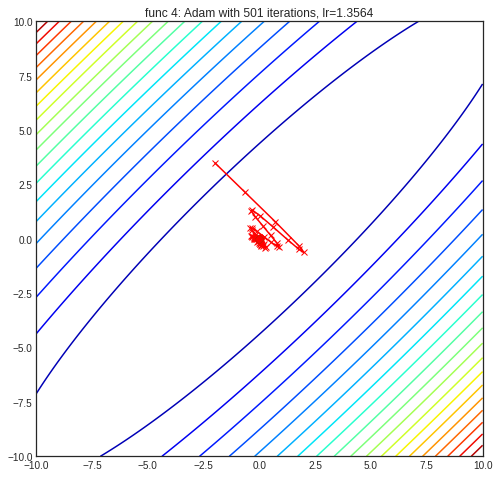

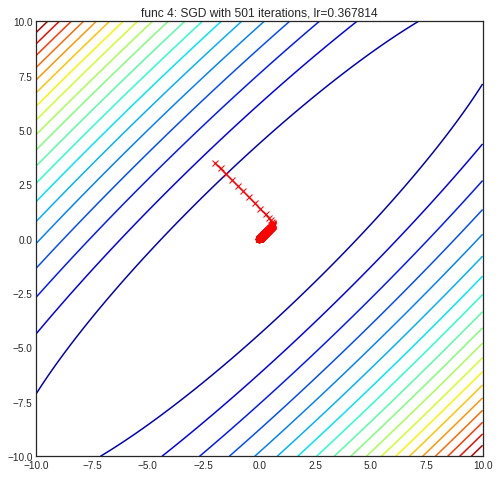

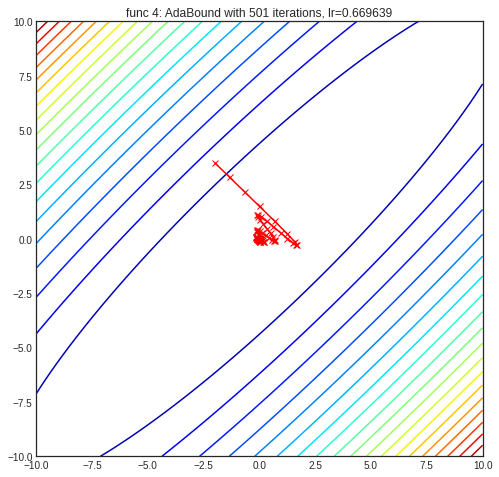

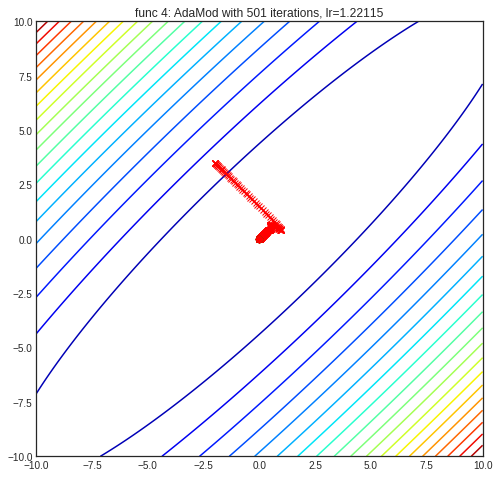

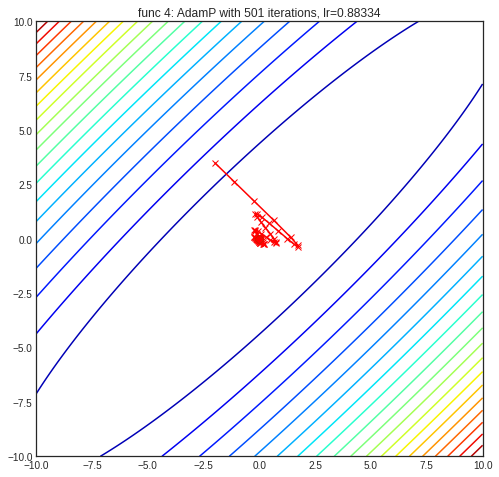

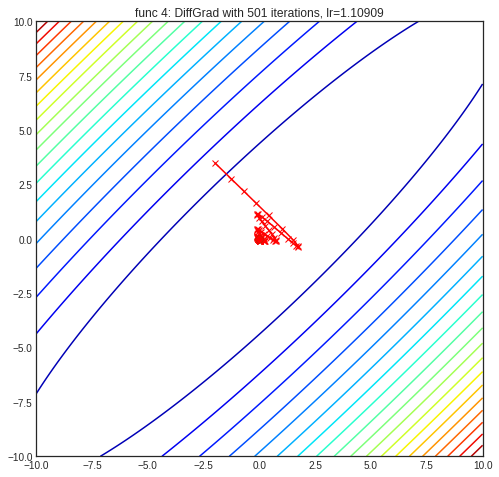

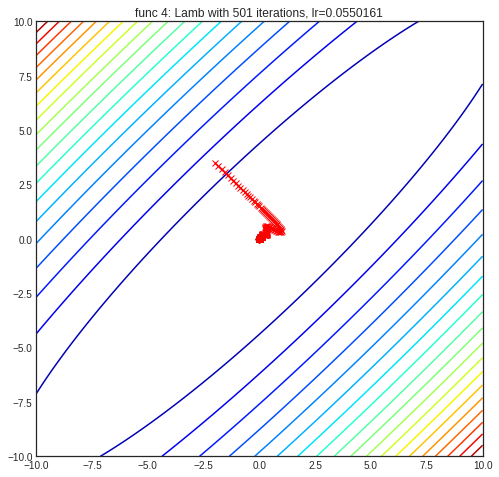

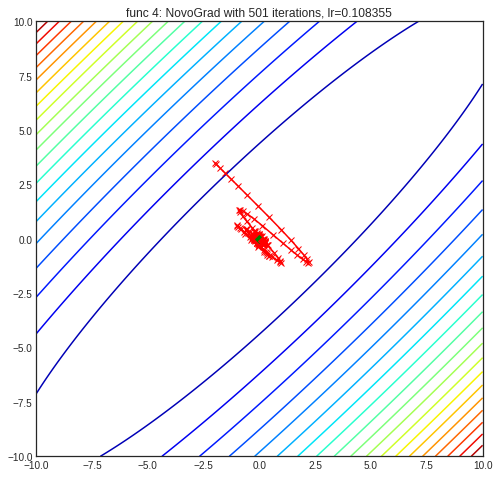

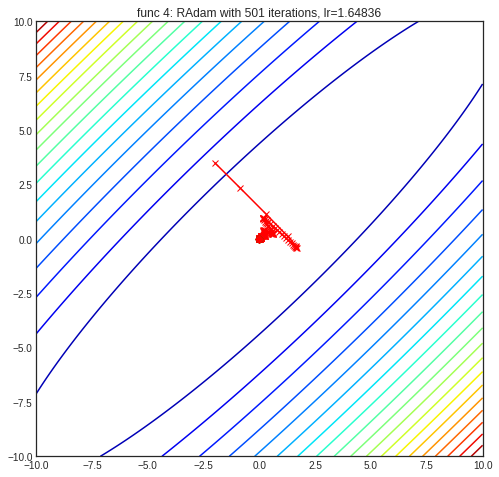

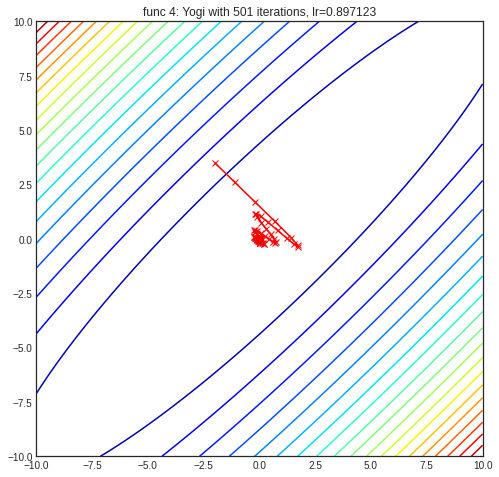

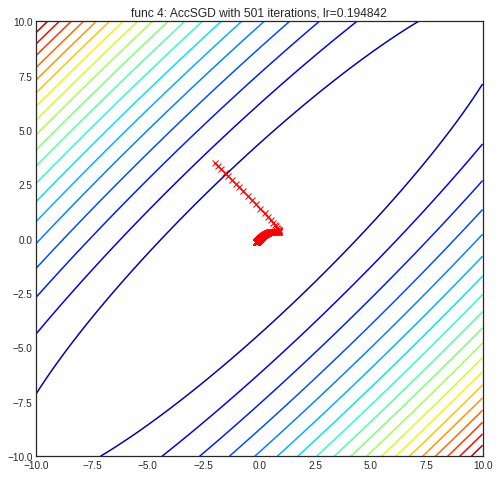

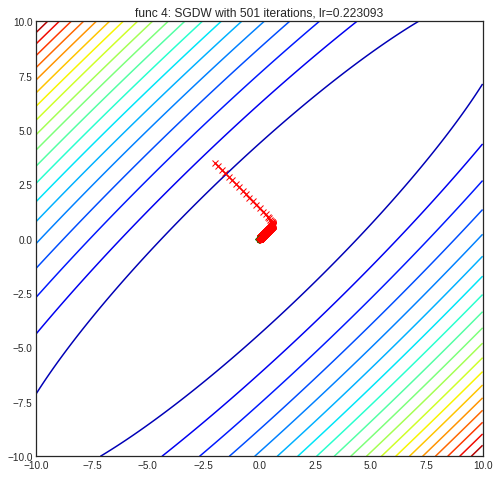

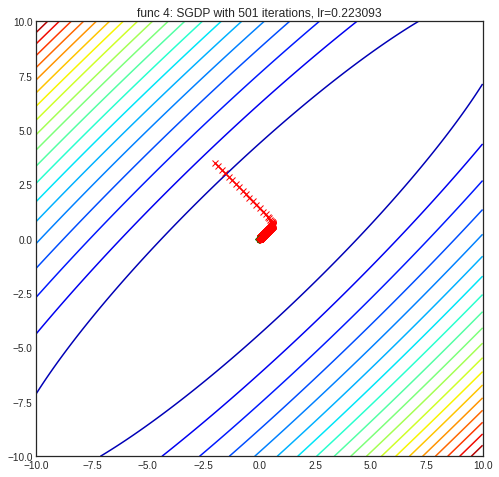

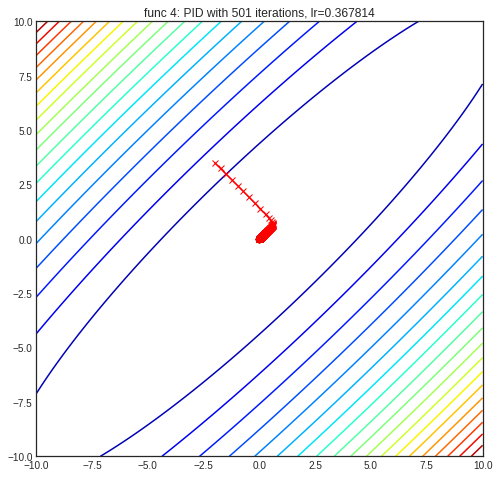

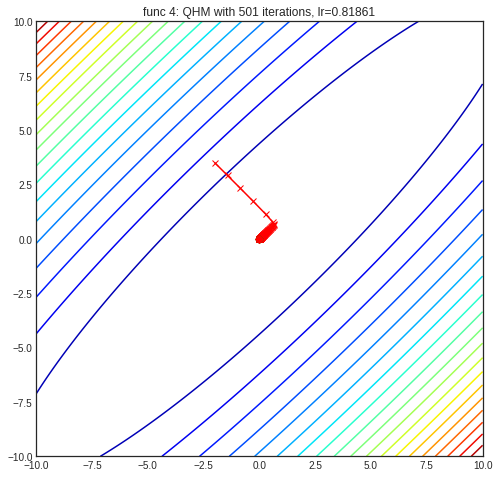

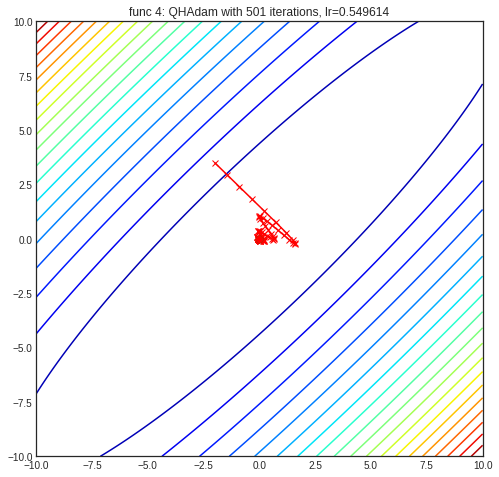

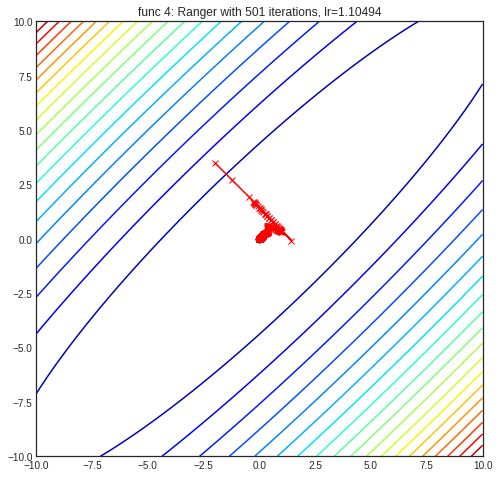

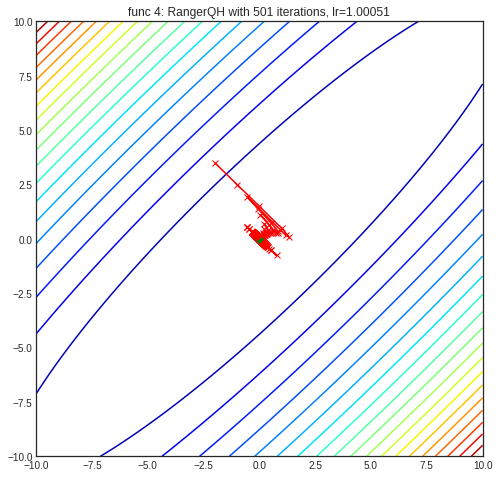

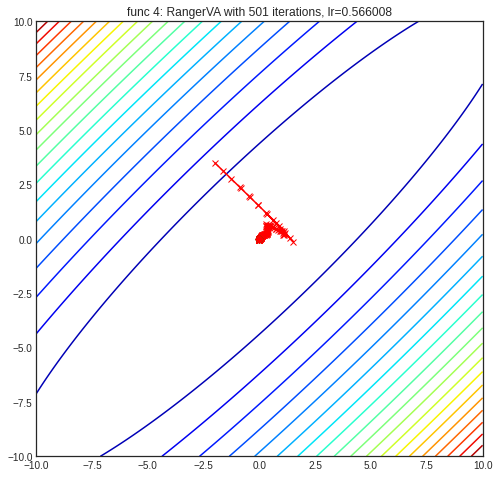

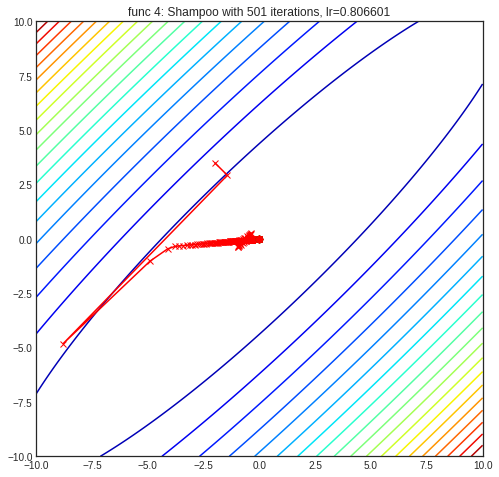

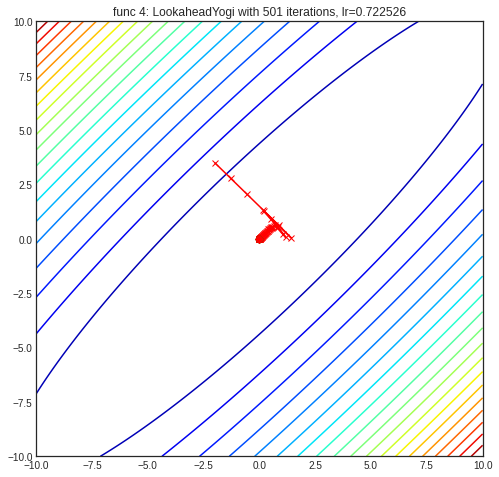

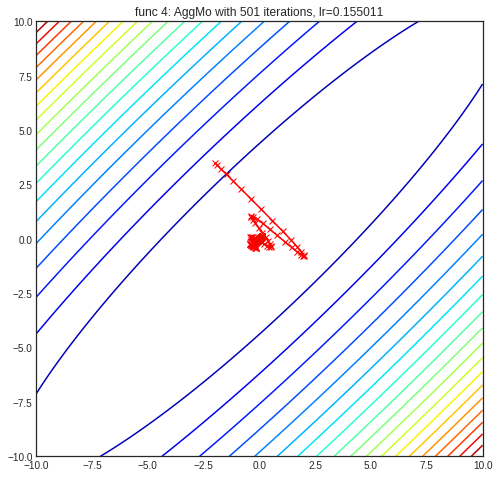

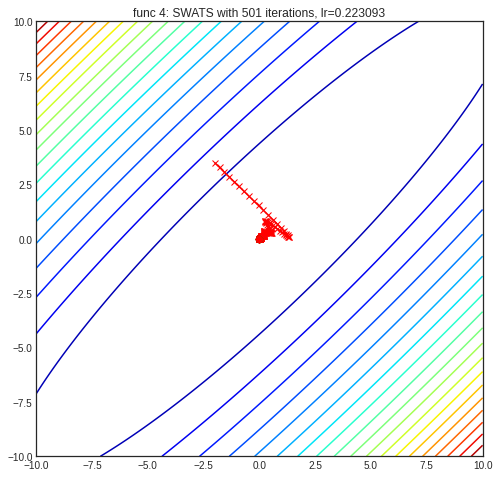

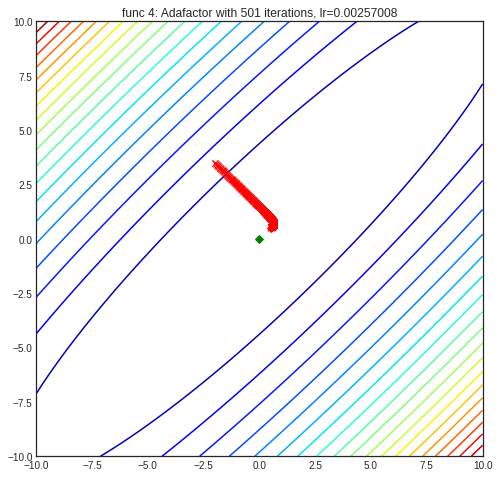

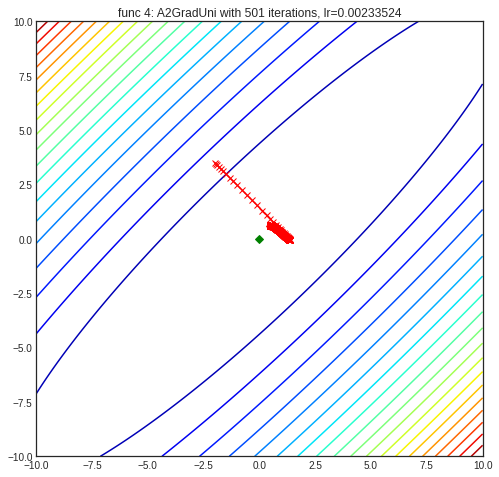

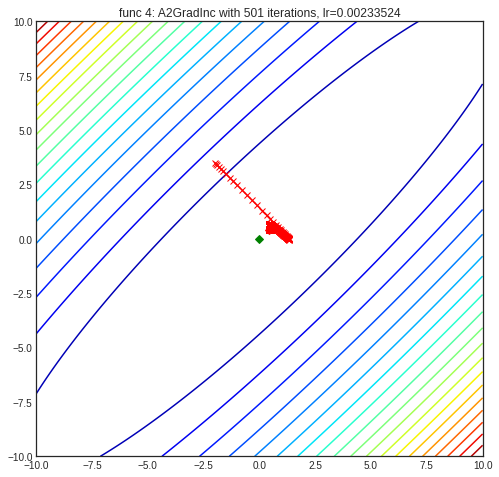

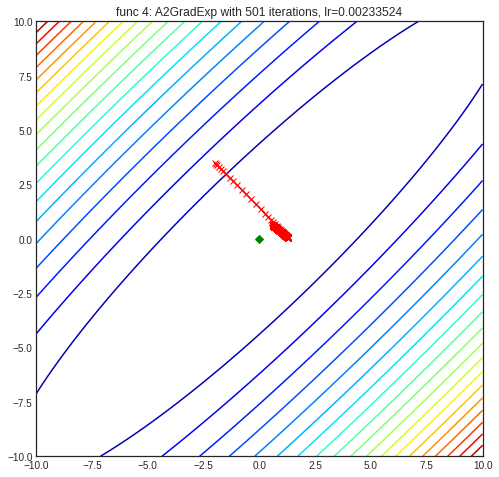

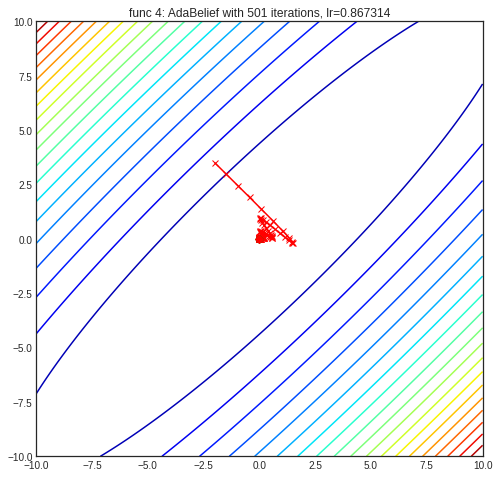

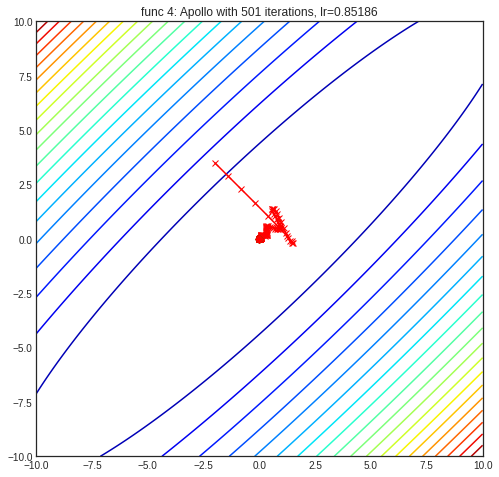

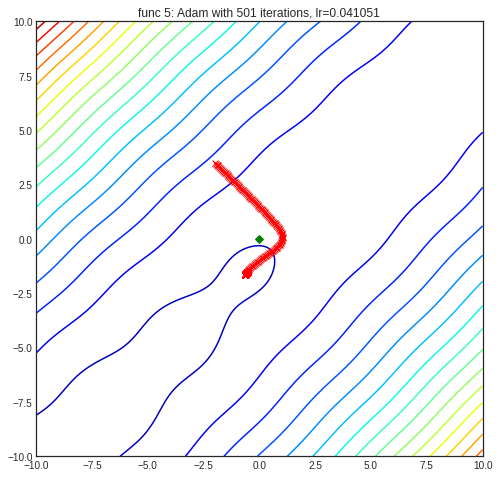

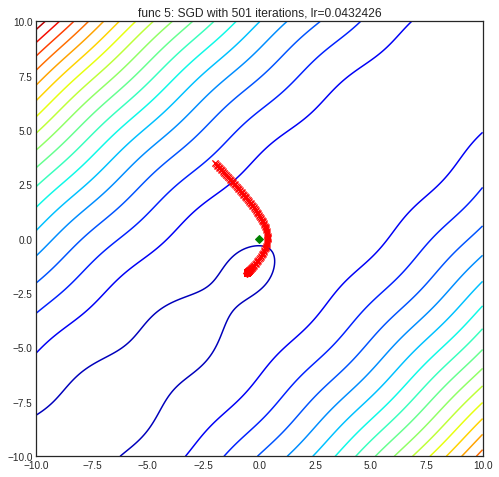

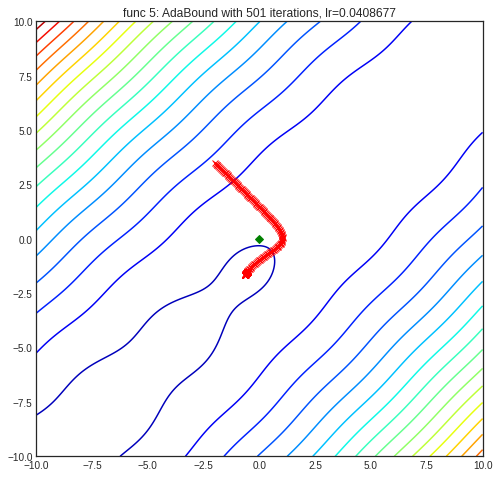

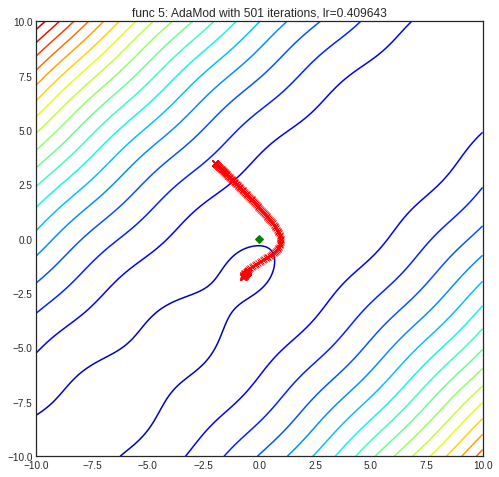

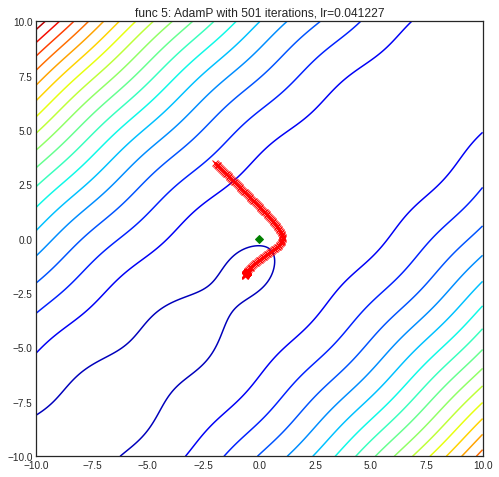

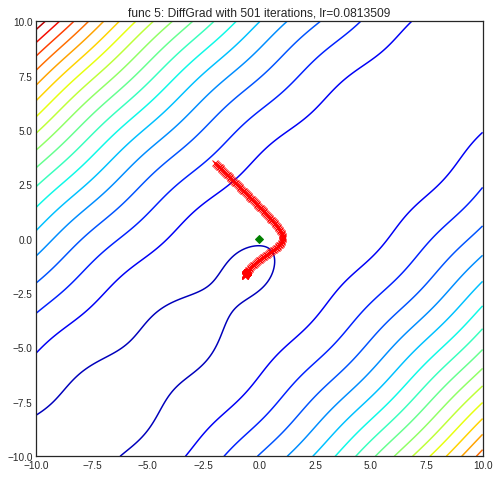

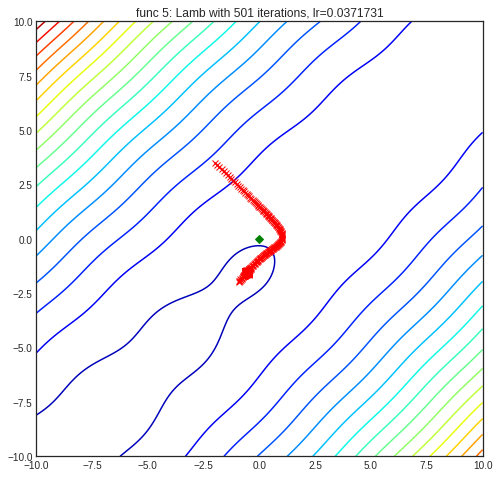

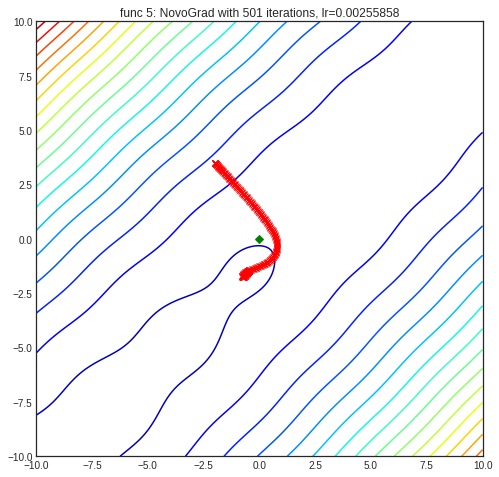

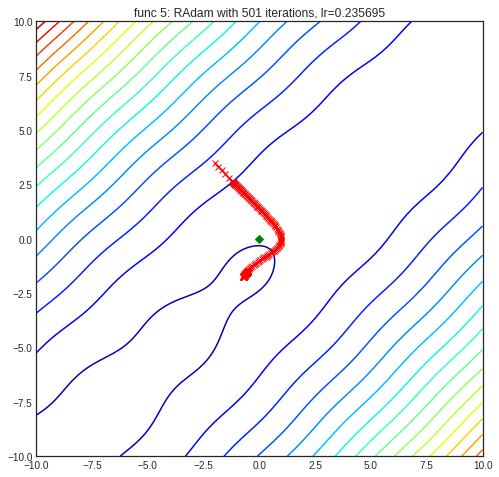

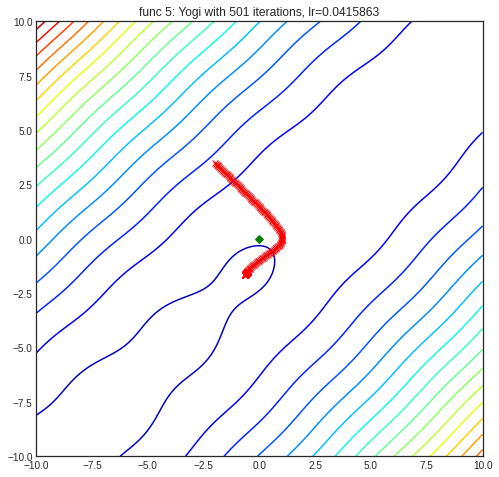

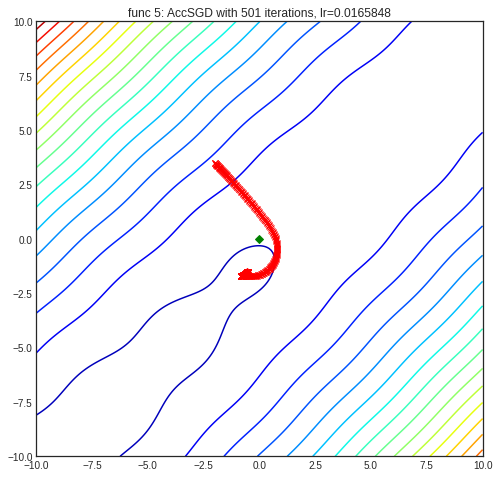

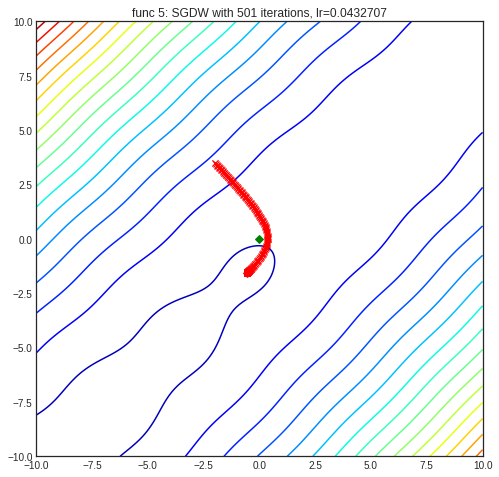

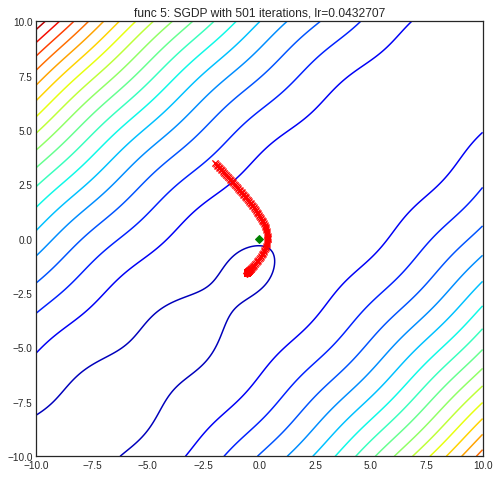

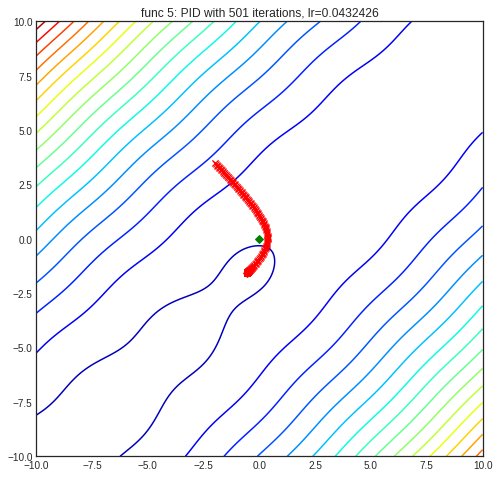

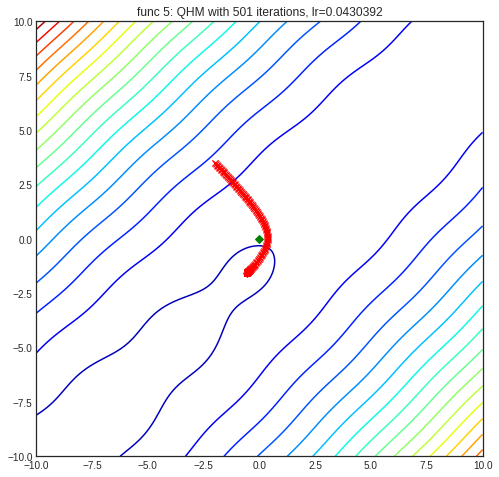

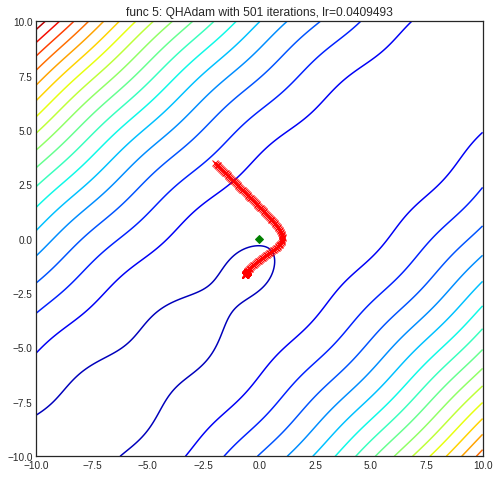

In [ ]:
for i, func in enumerate(func2_list):
    if i<4:
        continue
    def objective_F(params):
        lr = params['lr']
        optimizer_class = params['optimizer_class']
        initial_state = (-2.0, 3.5)
        minimum = (0, 0)
        optimizer_config = dict(lr=lr)
        num_iter = 100
        steps = execute_steps(
            func, initial_state, optimizer_class, optimizer_config, num_iter
        )
        return (steps[0][-1] - minimum[0]) ** 2 + (steps[1][-1] - minimum[1]) ** 2
    def plot_F(grad_iter, optimizer_name, lr):
        x = torch.linspace(-10, 10, 250)
        y = torch.linspace(-10, 10, 250)
        minimum = (0, 0)

        X, Y = torch.meshgrid(x, y)
        Z = func([X, Y])

        iter_x, iter_y = grad_iter[0, :], grad_iter[1, :]

        fig = plt.figure(figsize=(8, 8))

        ax = fig.add_subplot(1, 1, 1)
        ax.contour(X, Y, Z, 20, cmap='jet')
        ax.plot(iter_x, iter_y, color='r', marker='x')
        ax.set_title(
            'func {}: {} with '
            '{} iterations, lr={:.6}'.format(i, optimizer_name, len(iter_x), lr)
        )
        plt.plot(*minimum, 'gD')
        plt.plot(iter_x[-1], iter_y[-1], 'rD')
        plt.savefig('experiments/func{}_{}.png'.format(i,optimizer_name))
    execute_experiments(
        optimizers,
        objective_F, #F
        func, #F TODO
        plot_F, #F TODO
        (-2.0, 3.5),
    )